<a href="https://colab.research.google.com/github/seosztt/ML_Project/blob/master/input_merge_MMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
# colab 사용자만 실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 런타임 -> 런타임 다시 시작하고 아래 한글폰트 설정 시작
# 위에서 csv 파일은 다시 불러와야함.

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


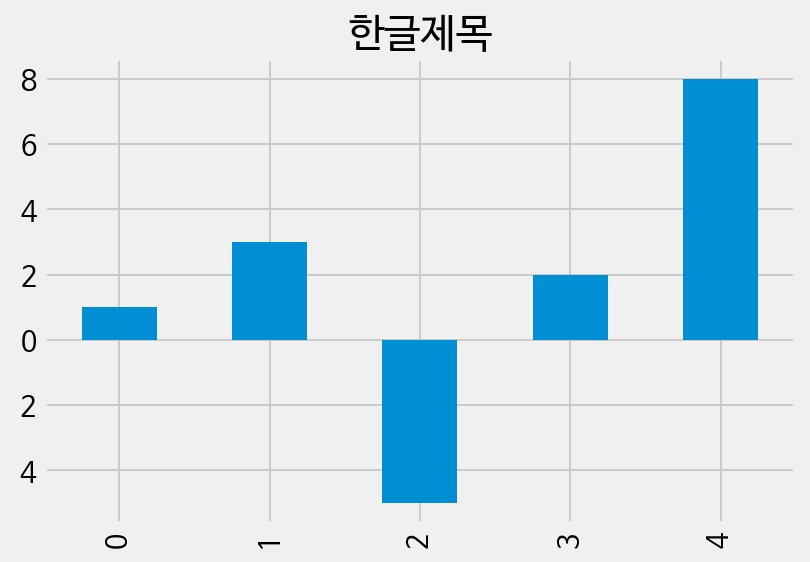

In [26]:
# matplotlib.pyplot 을 통해 한글폰트를 설정합니다.
# plt.style.use 로 "fivethirtyeight" 스타일을 사용해 봅니다.

import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', family='NanumBarunGothic') 
plt.style.use('fivethirtyeight')
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

pd.Series([1,3,-5,2,8]).plot.bar(title='한글제목')

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/train_inout_merge_random_state2045.csv')
test=pd.read_csv('/content/drive/MyDrive/2조/datasets/전처리/test_inout_merge_random_state2045.csv')

train.drop(columns=['Unnamed: 0'],inplace=True)
test.drop(columns=['Unnamed: 0'],inplace=True)

# MinMaxScaler

In [39]:
MMS_list=list(train.columns)
MMS_list.remove('price')
MMS_list

['kind',
 'market',
 'corp',
 'wide',
 'city',
 'year',
 'month',
 'area',
 'ratio',
 'amount',
 'weather',
 'inn',
 'out']

In [40]:
from sklearn.preprocessing import MinMaxScaler
MMS=MinMaxScaler()
train[MMS_list]=MMS.fit_transform(train[MMS_list])
test[MMS_list]=MMS.transform(test[MMS_list])

In [41]:
train

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,0.8,0.161290,0.291139,0.111111,0.421053,631.27,0.0,0.363636,0.418751,0.555019,0.606261,0.322581,0.000000,0.039755
1,0.1,0.322581,0.949367,0.666667,0.631579,1996.12,1.0,0.272727,0.597773,0.769884,0.994984,0.000000,0.116911,0.001976
2,0.1,0.322581,0.759494,0.111111,0.868421,825.31,0.6,0.363636,0.381727,0.697104,0.607446,0.322581,0.054904,0.043538
3,0.7,0.322581,0.949367,1.000000,0.289474,1072.90,0.2,0.818182,0.068481,0.132046,0.069701,0.419355,0.678943,0.000051
4,0.4,0.290323,0.430380,0.111111,0.868421,826.90,0.0,1.000000,0.418751,0.555019,0.606261,0.322581,0.067613,0.000189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20935,0.2,0.322581,0.759494,1.000000,0.500000,666.47,0.8,0.454545,0.060352,0.397876,0.077862,0.548387,0.035838,0.067939
20936,0.4,0.322581,0.759494,0.777778,0.078947,1365.81,1.0,0.181818,0.148184,0.724903,0.240205,0.064516,0.585500,0.000092
20937,0.4,0.193548,0.316456,1.000000,0.289474,433.33,0.6,0.727273,0.082531,0.181660,0.088247,0.419355,0.064290,0.169831
20938,0.6,0.322581,0.949367,0.666667,0.526316,406.94,0.6,0.909091,0.747283,0.446718,1.000000,0.258065,0.087990,0.074364


In [42]:
test

,kind,market,corp,wide,city,price,year,month,area,ratio,amount,weather,inn,out
0,0.6,0.645161,0.658228,0.666667,0.368421,615.70,0.4,0.818182,1.000000,0.072008,0.959922,0.258065,0.104608,0.000203
1,0.0,0.322581,0.759494,0.666667,0.526316,1019.25,0.2,0.545455,0.814704,0.196718,0.884642,0.258065,0.447857,0.000336
2,0.0,0.096774,0.164557,0.666667,0.947368,835.86,1.0,0.636364,0.597773,0.769884,0.994984,0.677419,0.043707,0.012934
3,0.4,0.064516,0.151899,0.666667,0.947368,617.54,0.8,0.363636,0.506583,0.641699,0.777718,0.677419,0.032814,0.002626
4,0.4,0.290323,0.430380,0.222222,0.684211,600.00,0.4,1.000000,0.296810,0.335328,0.363722,0.741935,0.077213,0.011077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,0.4,0.516129,0.582278,0.777778,0.710526,1233.33,0.8,1.000000,0.100027,0.644208,0.154048,0.870968,0.210318,0.000079
5232,0.0,0.064516,0.392405,0.666667,0.263158,384.25,0.4,0.181818,1.000000,0.072008,0.959922,0.129032,0.367861,0.001387
5233,0.6,0.161290,0.278481,0.222222,0.210526,450.00,0.8,0.000000,0.208094,0.683205,0.328360,0.806452,0.070284,0.000173
5234,0.2,0.387097,0.493671,0.444444,0.315789,1119.39,0.8,0.181818,0.030573,0.847683,0.053738,0.225806,0.131056,0.000077


In [43]:
train.to_csv('/content/drive/MyDrive/2조/datasets/전처리/train_inout_merge_MinMaxScaler.csv')
test.to_csv('/content/drive/MyDrive/2조/datasets/전처리/test_inout_merge_MinMaxScaler.csv')